# Question 1

## The Multivariate Gaussian distribution

The multivariate Gaussian distribution has the form 

\begin{align}
\mathcal{N}(x; \mu, \Sigma) &= |2\pi \Sigma|^{-1/2} \exp\left( -\frac{1}{2} (x-\mu)^\top \Sigma^{-1} (x-\mu) \right) \\
& = \exp\left(-\frac{1}{2} x^\top \Sigma^{-1} x + \mu^\top \Sigma^{-1} x   - \frac{1}{2} \mu^\top \Sigma^{-1} \mu   -\frac{1}{2}\log \det(2\pi \Sigma) \right) \\
\end{align}



## Gaussian Processes Regression

In Bayesian machine learning, a frequent problem encountered is the regression problem where we are given a pairs of inputs $x_i \in \mathbb{R}^N$ and associated noisy observations $y_i \in \mathbb{R}$. We assume the following model

\begin{eqnarray*}
y_i &\sim&  {\cal N}(y_i; f(x_i), R)
\end{eqnarray*}

The interesting thing about a Gaussian process is that the function $f$ is not specified in close form, but we assume that the function values 
\begin{eqnarray*}
f_i & = & f(x_i)
\end{eqnarray*}
are jointly Gaussian distributed as
\begin{eqnarray*}
\left(
  \begin{array}{c}
    f_1 \\
    \vdots \\
    f_L \\
  \end{array}
\right) & = & f_{1:L} \sim  {\cal N}(f_{1:L}; 0, \Sigma(x_{1:L}))
\end{eqnarray*}
Here, we define the entries of the covariance matrix $\Sigma(x_{1:L})$ as
\begin{eqnarray*}
\Sigma_{i,j} & = & K(x_i, x_j)
\end{eqnarray*}
for $i,j \in \{1, \dots, L\}$. Here, $K$ is a given covariance function. Now, if we wish to predict the value of $f$ for a new $x$, we simply form the following joint distribution:
\begin{eqnarray*}
\left(
  \begin{array}{c}
    f_1 \\
    f_2 \\
    \vdots \\
    f_L \\
    f \\
  \end{array}
\right) & \sim &  {\cal N}\left( \left(\begin{array}{c}
    0 \\
    0 \\
    \vdots \\
    0 \\
    0 \\
  \end{array}\right)
  , \left(\begin{array}{cccccc}
    K(x_1,x_1) & K(x_1,x_2) & \dots & K(x_1, x_L) &  K(x_1, x) \\
    K(x_2,x_1) & K(x_2,x_2) & \dots & K(x_2, x_L) & K(x_2, x) \\
    \vdots &\\
    K(x_L,x_1) & K(x_L,x_2) & \dots & K(x_L, x_L) &  K(x_L, x)   \\
    K(x,x_1) & K(x,x_2) & \dots & K(x, x_L) &  K(x, x)   \\
  \end{array}\right) \right) \\
\left(
\begin{array}{c}
    f_{1:L} \\
    f 
  \end{array}
\right) & \sim &  {\cal N}\left( \left(\begin{array}{c}
    \mathbf{0} \\
    0 \\
  \end{array}\right)
  , \left(\begin{array}{cc}
    \Sigma(x_{1:L}) &  k(x_{1:L}, x) \\
    k(x_{1:L}, x)^\top &  K(x, x)   \\
  \end{array}\right) \right) \\
\end{eqnarray*}

Here,  $k(x_{1:L}, x)$ is a $L \times 1$ vector with entries $k_i$ where

\begin{eqnarray*}
k_i = K(x_i, x) 
\end{eqnarray*}

Popular choices of covariance functions to generate smooth regression functions include a Bell shaped one
\begin{eqnarray*}
K_1(x_i, x_j) & = & \exp\left(-\frac{1}2 \| x_i - x_j \|^2 \right)
\end{eqnarray*}
and a Laplacian
\begin{eqnarray*}
K_2(x_i, x_j) & = & \exp\left(-\frac{1}2 \| x_i - x_j \| \right)
\end{eqnarray*}

where $\| x \| = \sqrt{x^\top x}$ is the Euclidian norm.

## Part 1
From your notes, derive the expressions to compute the predictive density
\begin{eqnarray*}
p(\hat{y}| y_{1:L}, x_{1:L}, \hat{x})
\end{eqnarray*}


\begin{eqnarray*}
p(y | y_{1:L}, x_{1:L}, x) &=& {\cal N}(y; m, S) \\
m & = & \\
S & = & 
\end{eqnarray*}

## Part 2
Write a program to compute the mean and covariance of $p(\hat{y}| y_{1:L}, x_{1:L}, \hat{x})$ to generate a for the following data:

     x = [-2 -1 0 3.5 4]
     y = [4.1 0.9 2 12.3 15.8]
     
Try different covariance functions $K_1$ and $K_2$ and observation noise covariances $R$ and comment on the nature of the approximation.

## Part 3
Suppose we are using a covariance function parameterised by
\begin{eqnarray*}
K_\beta(x_i, x_j) & = & \exp\left(-\frac{1}\beta  \| x_i - x_j \|^2 \right)
\end{eqnarray*}
Find the optimum regularisation parameter $\beta^*(R)$ as a function of observation noise variance via maximisation of the marginal likelihood, i.e.
\begin{eqnarray*}
\beta^* & = & \arg\max_{\beta} p(y_{1:N}| x_{1:N}, \beta, R)
\end{eqnarray*}
Generate a plot of $b^*(R)$ for $R = 0.01, 0.02, \dots, 1$ for the dataset given in 2.

Here, remember that 
\begin{eqnarray*}
p(y_{1:N}| x_{1:N}, \beta, R) = \mathcal{N}(y_{1:N}; 0, K(x_{1:N})+R)
\end{eqnarray*}

For your reference, we give a basic implementation below:

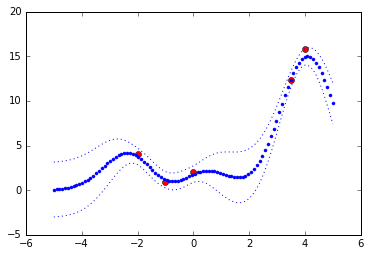

In [1]:
%matplotlib inline
import networkx as nx
#import pygraphviz
import pyparsing
import numpy as np
import matplotlib as mlab
import matplotlib.pylab as plt

def cov_fun_bell(x1,x2,delta=1):
    return np.exp(-0.5*np.abs(x1-x2)**2/delta) 

def cov_fun_exp(x1,x2):
    return np.exp(-0.5*np.abs(x1-x2)) 

def cov_fun(x1,x2):
    return cov_fun_bell(x1,x2,delta=1) 

R = 0.05

x = np.array([-2, -1, 0, 3.5, 4]);
y = np.array([4.1, 0.9, 2, 12.3, 15.8]);

Sig = cov_fun(x.reshape((len(x),1)),x.reshape((1,len(x)))) + R*np.eye(len(x))
SigI = np.linalg.inv(Sig)

xx = np.linspace(-5,5,100)
yy = np.zeros_like(xx)
ss = np.zeros_like(xx)
for i in range(len(xx)):
    z = np.r_[x,xx[i]]
    CrossSig = cov_fun(x,xx[i])
    PriorSig = cov_fun(xx[i],xx[i]) + R
    
    yy[i] = np.dot(np.dot(CrossSig, SigI),y)
    ss[i] = PriorSig - np.dot(np.dot(CrossSig, SigI),CrossSig)
    

plt.plot(x,y,'or')
plt.plot(xx,yy,'b.')
plt.plot(xx,yy+3*np.sqrt(ss),'b:')
plt.plot(xx,yy-3*np.sqrt(ss),'b:')
plt.show()

In [2]:
# m = mu_1:L + K(x_1:L, x^)*(1/K(x^*x^))*(y^- mu_x^)
# S = sum(x_1:L) - K(x_1:L, x^)*(1/K(x^*x^))*K(x_1:L, x^)T

def getParamsForBellShaped (x, y, R):
    xx = np.linspace(-5,5,100)
    mu_arr = np.zeros_like(xx)
    var_arr = np.zeros_like(xx)
    for i in range(len(xx)):
        z = np.r_[x,xx[i]]
        CrossSig = cov_fun_bell(x,xx[i],delta=1)
        PriorSig = cov_fun_bell(xx[i],xx[i],delta=1) + R
    
        mu_arr[i] = np.dot(np.dot(CrossSig, SigI),y)
        var_arr[i] = PriorSig - np.dot(np.dot(CrossSig, SigI),CrossSig)
    
    return mu_arr, var_arr

def getParamsForLaplacian (x, y, R):
    xx = np.linspace(-5,5,100)
    mu_arr = np.zeros_like(xx)
    var_arr = np.zeros_like(xx)
    for i in range(len(xx)):
        z = np.r_[x,xx[i]]
        CrossSig = cov_fun_exp(x,xx[i])
        PriorSig = cov_fun_exp(xx[i],xx[i]) + R
    
        mu_arr[i] = np.dot(np.dot(CrossSig, SigI),y)
        var_arr[i] = PriorSig - np.dot(np.dot(CrossSig, SigI),CrossSig)
    
    return mu_arr, var_arr
    

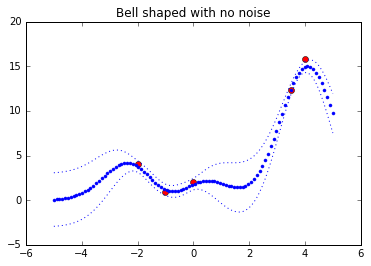

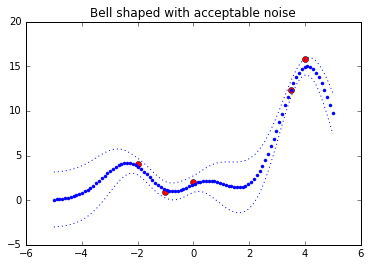

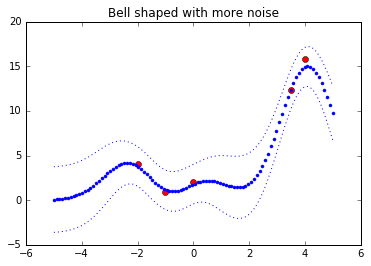

In [3]:
R = 0

mu_Bell_noNoise, var_Bell_noNoise = getParamsForBellShaped(x,y,R)

plt.title('Bell shaped with no noise')
plt.plot(x,y,'or')
plt.plot(xx,mu_Bell_noNoise,'b.')
plt.plot(xx,mu_Bell_noNoise+3*np.sqrt(var_Bell_noNoise),'b:')
plt.plot(xx,mu_Bell_noNoise-3*np.sqrt(var_Bell_noNoise),'b:')
plt.show()

R = 0.05

mu_Bell_acceptableNoise, var_Bell_acceptableNoise = getParamsForBellShaped(x,y,R)

plt.title('Bell shaped with acceptable noise')
plt.plot(x,y,'or')
plt.plot(xx,mu_Bell_acceptableNoise,'b.')
plt.plot(xx,mu_Bell_acceptableNoise+3*np.sqrt(var_Bell_acceptableNoise),'b:')
plt.plot(xx,mu_Bell_acceptableNoise-3*np.sqrt(var_Bell_acceptableNoise),'b:')
plt.show()

R = 0.5

mu_Bell_Noise, var_Bell_Noise = getParamsForBellShaped(x,y,R)

plt.title('Bell shaped with more noise')
plt.plot(x,y,'or')
plt.plot(xx,mu_Bell_Noise,'b.')
plt.plot(xx,mu_Bell_Noise+3*np.sqrt(var_Bell_Noise),'b:')
plt.plot(xx,mu_Bell_Noise-3*np.sqrt(var_Bell_Noise),'b:')
plt.show()

/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


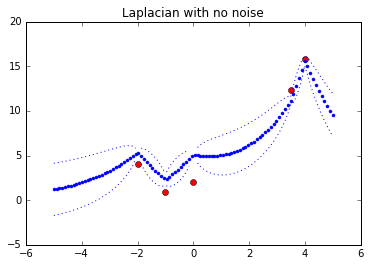

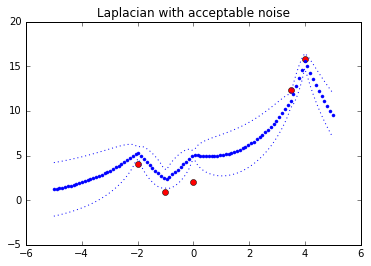

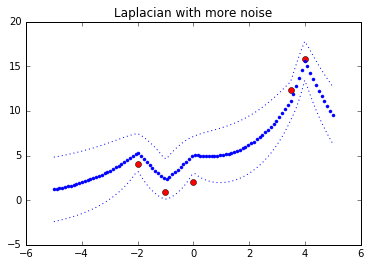

In [4]:
R = 0

mu_Laplacian_noNoise, var_Laplacian_noNoise = getParamsForLaplacian(x,y,R)

plt.title('Laplacian with no noise')
plt.plot(x,y,'or')
plt.plot(xx,mu_Laplacian_noNoise,'b.')
plt.plot(xx,mu_Laplacian_noNoise+3*np.sqrt(var_Laplacian_noNoise),'b:')
plt.plot(xx,mu_Laplacian_noNoise-3*np.sqrt(var_Laplacian_noNoise),'b:')
plt.show()

R = 0.05

mu_Laplacian_acceptableNoise, var_Laplacian_acceptableNoise = getParamsForLaplacian(x,y,R)

plt.title('Laplacian with acceptable noise')
plt.plot(x,y,'or')
plt.plot(xx,mu_Laplacian_acceptableNoise,'b.')
plt.plot(xx,mu_Laplacian_acceptableNoise+3*np.sqrt(var_Laplacian_acceptableNoise),'b:')
plt.plot(xx,mu_Laplacian_acceptableNoise-3*np.sqrt(var_Laplacian_acceptableNoise),'b:')
plt.show()

R = 0.5

mu_Laplacian_Noise, var_Laplacian_Noise = getParamsForLaplacian(x,y,R)

plt.title('Laplacian with more noise')
plt.plot(x,y,'or')
plt.plot(xx,mu_Laplacian_Noise,'b.')
plt.plot(xx,mu_Laplacian_Noise+3*np.sqrt(var_Laplacian_Noise),'b:')
plt.plot(xx,mu_Laplacian_Noise-3*np.sqrt(var_Laplacian_Noise),'b:')
plt.show()

# Question 2

Read http://mbmlbook.com/TrueSkill.html
and
http://mbmlbook.com/TrueSkill_Modelling_the_outcome_of_games.html

* Write a program that produces 10,000 samples from a Gaussian with zero mean and a standard deviation of 1. Compute the percentage of these samples which lie between -1 and 1, between -2 and 2 and between -3 and 3. You should find that these percentages are close to those given in the caption of Figure 3.4.

* Construct a histogram of the samples created in the previous exercise (like the ones in Figure 3.7) and verify that it resembles a bell-shaped curve.

* Compute the mean, standard deviation and variance of your samples, referring to Panel 3.1. The mean should be close to zero and the standard deviation and variance should both be close to 1 (since 1^2=1).

* Produce a second set of 10,000 samples from a Gaussian with mean 1 and standard deviation 1. Plot a scatter plot like Figure 3.8 where the X co-ordinate of each point is a sample from the first set and the Y co-ordinate is the corresponding sample from the second set (pairing the first sample from each set, the second sample from each set and so on). Compute the fraction of samples which lie above the diagonal line where X=Y.


* Create double variables X and Y with priors of Gaussian(0,1) and Gaussian(1,1) respectively. Define a third random variable Ywins that equals to Y>X. Compute the posterior distribution numerically over Ywins and verify that it is close to the fraction of samples above the diagonal in the previous exercise.


In [5]:
s = np.random.normal(0, 1, 10000)

In [6]:
s

array([ 1.0752768 ,  0.16728884,  0.81234303, ...,  0.80191932,
       -1.37935117, -0.44773786])

In [7]:
ones = 0.0
twos = 0.0
threes = 0.0

for a in s:
    if(a>-1) and (a<1):
        ones = ones + 1

for a in s:
    if(a>-2) and (a<2):
        twos = twos + 1
        
for a in s:
    if(a>-3) and (a<3):
        threes = threes + 1


print ('between -1 and 1: ', ones, ' the percentage is ', ones/10000)
print ('between -2 and 2: ', ones, ' the percentage is ', twos/10000)
print ('between -3 and 3: ', ones, ' the percentage is ', threes/10000)

between -1 and 1:  6840.0  the percentage is  0.684
between -2 and 2:  6840.0  the percentage is  0.9557
between -3 and 3:  6840.0  the percentage is  0.9972


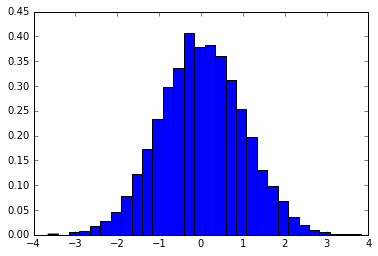

In [8]:
count, bins, ignored = plt.hist(s, 30, normed=True)

In [9]:
print('mean: ', np.mean(s))
print('standart deviation: ', np.std(s))
print('variance: ', np.var(s))

mean:  0.0106378712905
standart deviation:  0.997420814875
variance:  0.994848281945


In [10]:
s2 = np.random.normal(1, 1, 10000)

In [11]:
s2

array([-0.20933116, -0.13648971, -1.65970869, ...,  0.25923256,
        1.25168719,  1.19172228])

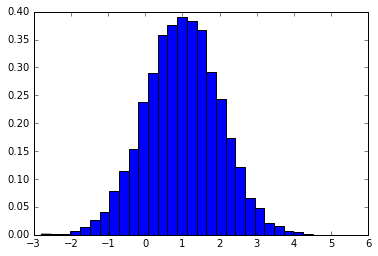

In [12]:
count, bins, ignored = plt.hist(s2, 30, normed=True)

<function matplotlib.pyplot.show>

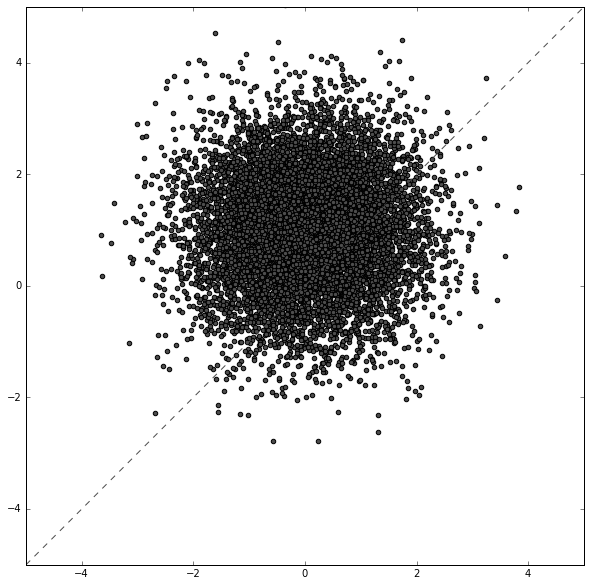

In [13]:
f, ax = plt.subplots(figsize=(10, 10))

ax.scatter(s, s2, c=".3")
ax.set(xlim=(-5, 5), ylim=(-5, 5))

# Plot your initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.show

In [14]:
aboveDiag = 0
for i in range(10000-1):
    if (s2[i]>s[i]):
        aboveDiag = aboveDiag + 1
        
print('Percentage of points above the diagonal line: ', aboveDiag/10000)


Percentage of points above the diagonal line:  0.7615


In [15]:
mu_x = 0
sigma_x = 1
x = np.random.normal(mu_x, sigma_x)
print('x: ',x)
mu_y = 1
sigma_y = 1
y = np.random.normal(mu_y, sigma_y)
print('y: ',y)

x:  -0.441393007850926
y:  1.010040315208585


* if y>x -> yWins = 1 
* else   -> yWins = 0 
* P(Y>X)=P(Y−X>0)=P(X-Y≤0)
* Y-X should be normally distributed
* Let's define a new variable D = X - Y
* From independency mu and sigma values for the distribution of D can be calculated as below

In [16]:
import math
mu =   mu_x - mu_y
sigmaSquare = sigma_y*sigma_y + sigma_x*sigma_x
sigma = math.sqrt( sigmaSquare )

In [17]:
print('sigma: ', sigma)
print('mu: ', mu)

sigma:  1.4142135623730951
mu:  -1


The cumulative distribution function gives the probability of D < 0 i.e. the area under the distribution where D < 0

Substituting 0 we get the following expression:

In [18]:
import scipy
(1 + (scipy.special.erf(-mu/(sigma*math.sqrt(2)))))/2

0.76024993890652315

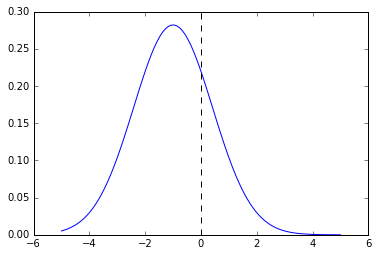

In [19]:
from scipy.stats import norm
x = np.linspace(-5, 5, 100)
plt.plot(x,norm.pdf(x, mu, sigma))
plt.plot([0, 0], [0, 0.3], 'k--', lw=1)

It can be seen on the plot above that the area under the curve where D < 0 should be around %75 of the total area.